In [2]:
!pip3 install imblearn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
%matplotlib inline

In [3]:
#load data set
df = pd.read_csv("/Users/macbook/Desktop/internship/data/fitness.csv")

In [4]:
#display dataset info
print("Dataset Shape:",df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (1500, 8)

First 5 Rows:


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [5]:
#check for missing values 
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [6]:
# Handle missing values
# Option 1: Drop rows with missing values
df = df.dropna()


## Performing Exploratory Data Analysis

In [7]:
# 1.Data structure
print("shape of dataset:", df.shape)  # rows, columns
print("\nData types and non-null counts:")
print(df.info())    #column data type
print("\nFirst 5 rows")
print(df.head())

shape of dataset: (1480, 8)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1480 non-null   int64  
 1   months_as_member  1480 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1480 non-null   object 
 4   day_of_week       1480 non-null   object 
 5   time              1480 non-null   object 
 6   category          1480 non-null   object 
 7   attended          1480 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 104.1+ KB
None

First 5 rows
   booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM 

In [8]:
#2.missing values
print("\nMissing Values per column:")
print(df.isnull().sum())


Missing Values per column:
booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


In [9]:
#3.Summary statistics
print("\nSummary statistics (numeric columns):")
print(df.describe().T)


Summary statistics (numeric columns):
                   count        mean         std    min     25%     50%  \
booking_id        1480.0  749.621622  433.758225   1.00  374.75  749.50   
months_as_member  1480.0   15.659459   12.971138   1.00    8.00   12.00   
weight            1480.0   82.610378   12.765859  55.41   73.49   80.76   
attended          1480.0    0.303378    0.459873   0.00    0.00    0.00   

                      75%      max  
booking_id        1126.25  1500.00  
months_as_member    19.00   148.00  
weight              89.52   170.52  
attended             1.00     1.00  


In [10]:
#4. Distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


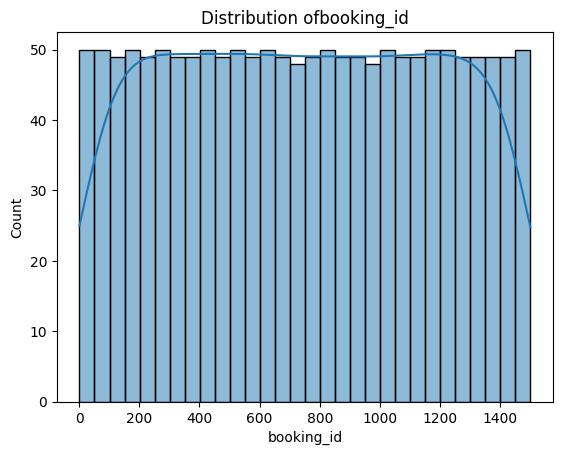

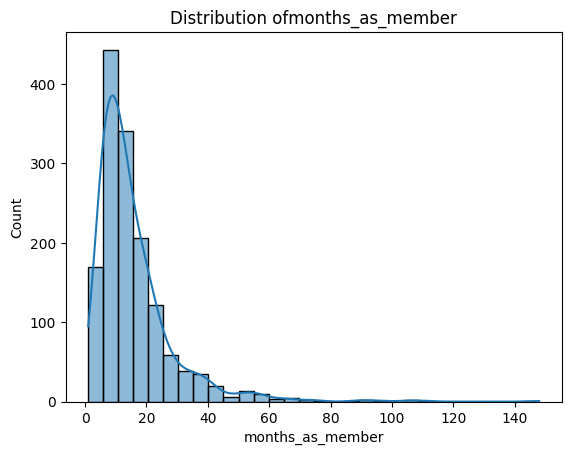

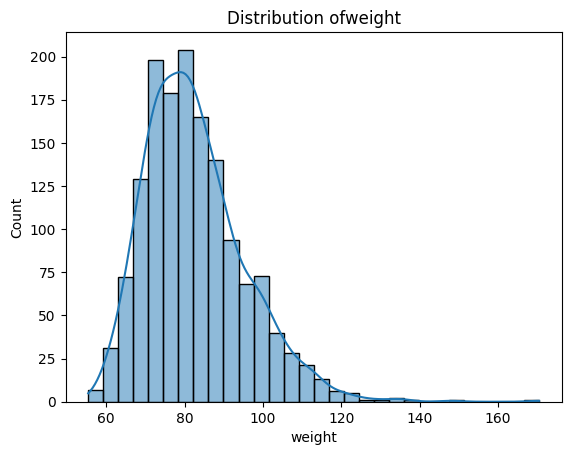

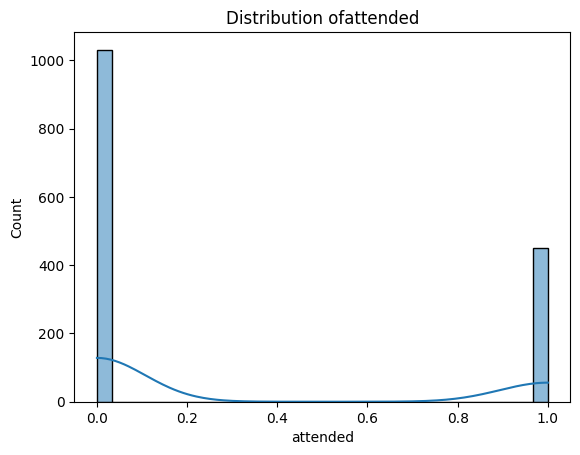

In [11]:
#Hisogram - numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of{col}")
    plt.show()

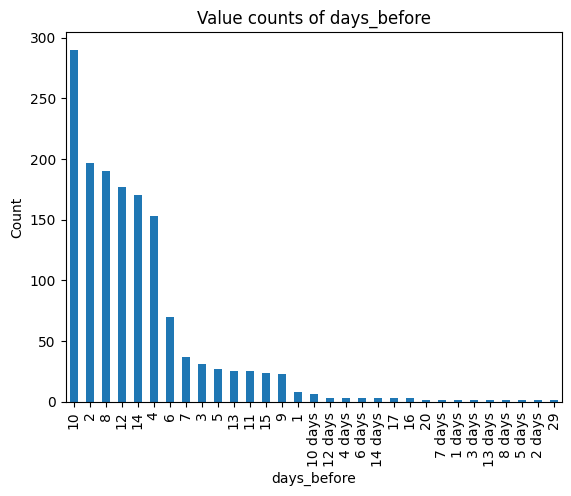

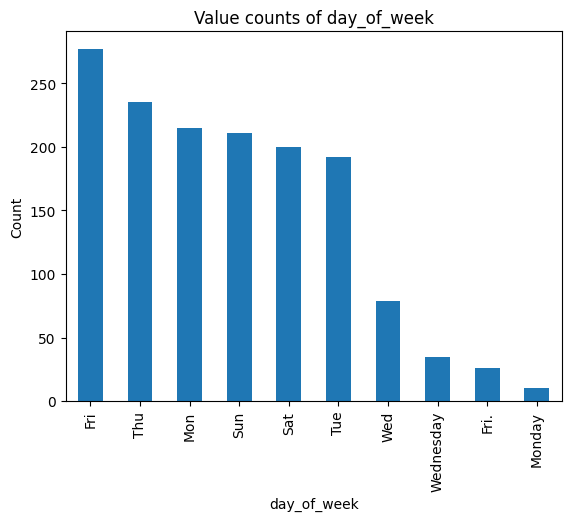

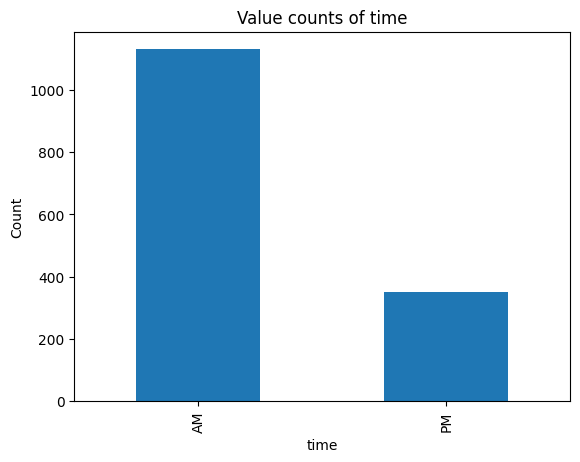

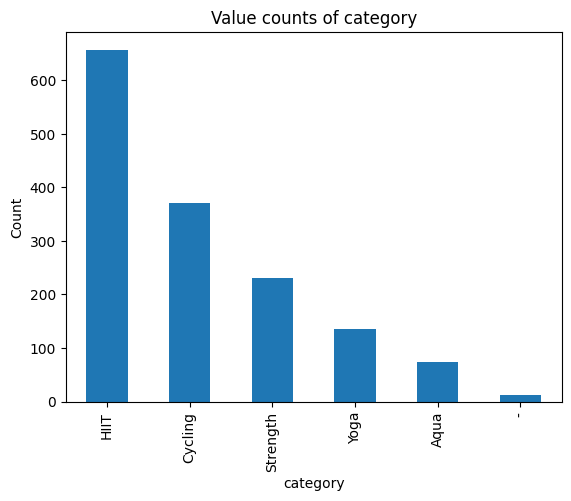

In [12]:
# Bar plots - categorical columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Value counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

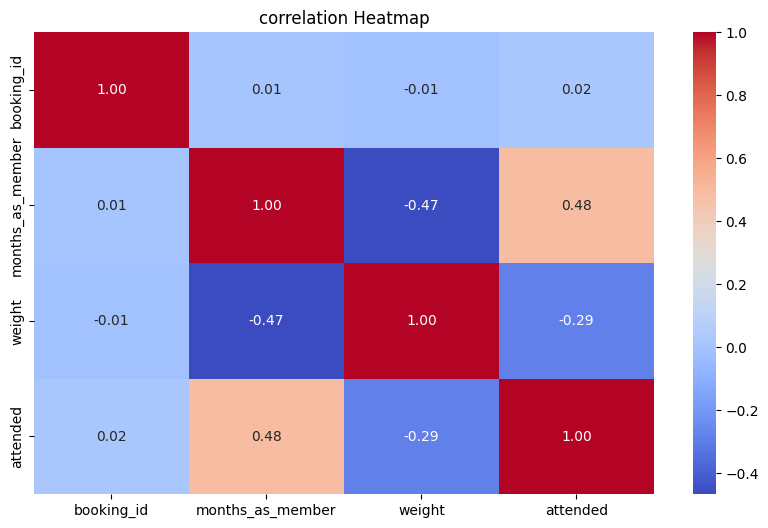

In [13]:
#5. Relationships between variables
# correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("correlation Heatmap")
    plt.show()

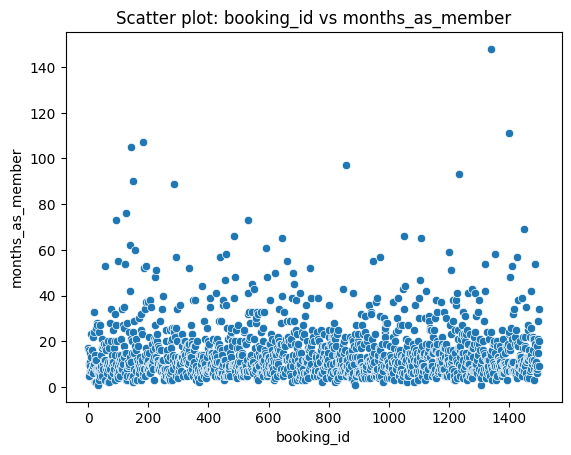

In [14]:
# Scatter plots for pairs (just first 2 numeric cols as example)
if len(numeric_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f"Scatter plot: {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()

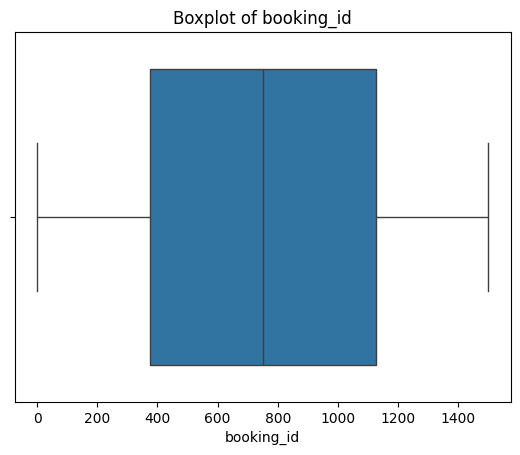

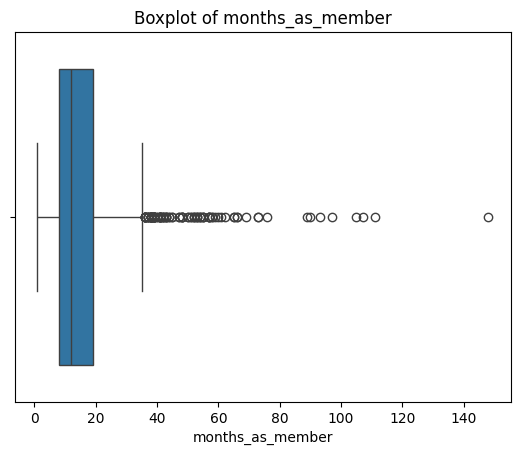

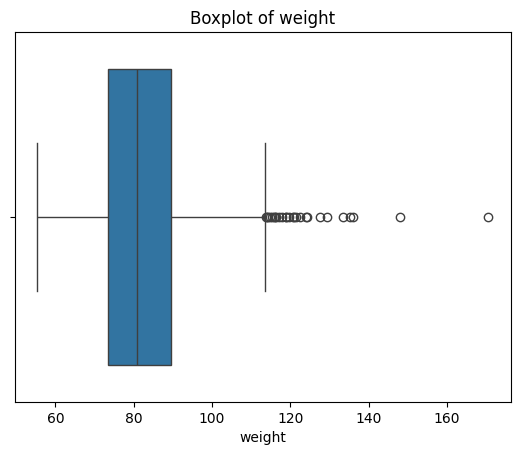

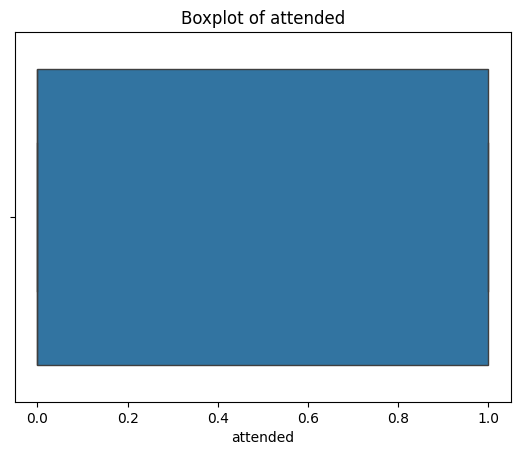

In [15]:
#6. outliers (boxplots for numeric columns)
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

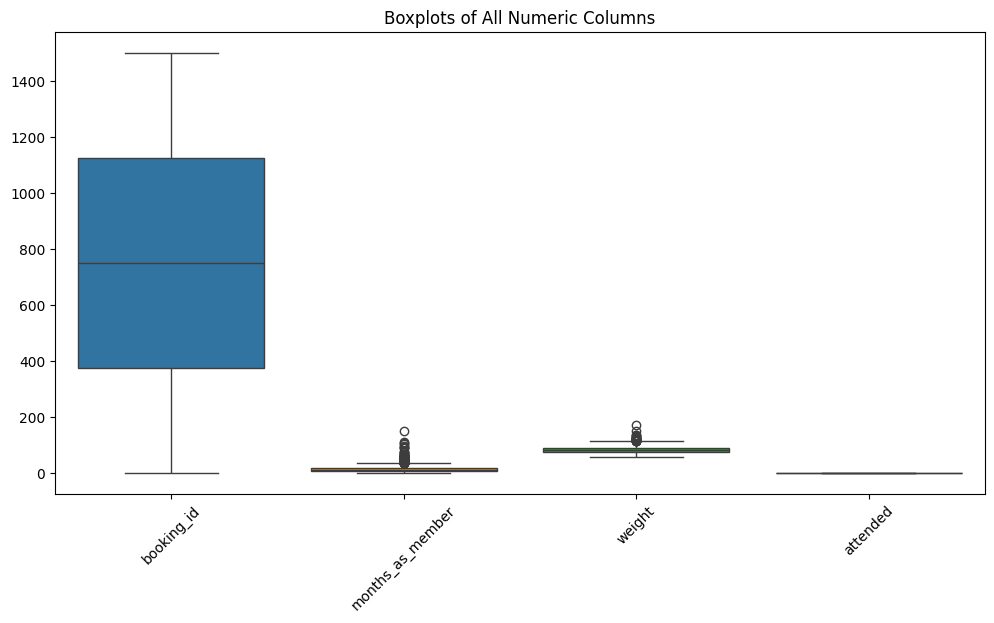

In [16]:
# 6. Outliers (boxplots for all numeric columns in one figure)
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of All Numeric Columns")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()

## Preprocessing

In [17]:
# Encode categorical variables using label encoding, feel free to try one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
# Split features and target
X = df.drop('time', axis=1)
y = df['time']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Balancing the Dataset (SMOTE: Oversampling using imblearn library)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [2]:
#logistic regression
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test_scaled)




print("\nLogisitic Regression Performance (With Balancing):")
print(classification_report(y_test, y_pred_lr_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_balanced))

NameError: name 'LogisticRegression' is not defined

In [22]:
# Random forest
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

print("\nRandom forest performance (with balancing):")
print(classification_report(y_test, y_pred_rf_balanced))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_rf_balanced))


Random forest performance (with balancing):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       341
           1       0.63      0.44      0.52       103

    accuracy                           0.81       444
   macro avg       0.74      0.68      0.70       444
weighted avg       0.80      0.81      0.80       444


Confusion Matrix
[[315  26]
 [ 58  45]]


In [23]:
#Hyperparameter Tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Evaluate tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
    


Best Parameters for Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       341
           1       0.60      0.42      0.49       103

    accuracy                           0.80       444
   macro avg       0.72      0.67      0.68       444
weighted avg       0.78      0.80      0.79       444

Confusion Matrix:
[[312  29]
 [ 60  43]]


In [24]:
#Cross-Validation (Random Forest)
cv_scores_rf = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())


Random Forest Cross-Validation Scores: [0.81962025 0.85443038 0.91772152 0.93015873 0.91428571]
Mean CV Accuracy: 0.8872433192686359


In [25]:
#Gradient Boosting Trees (GBT)
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train_balanced, y_train_balanced)
y_pred_gbt = gbt.predict(X_test_scaled)

print("\nGradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))



Gradient Boosting Trees Performance:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       341
           1       0.67      0.56      0.61       103

    accuracy                           0.84       444
   macro avg       0.77      0.74      0.75       444
weighted avg       0.83      0.84      0.83       444

Confusion Matrix:
[[313  28]
 [ 45  58]]


In [26]:
# Hyperparameter Tuning
# Logistic Regression GridSearchCV
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr_balanced.predict(X_test_scaled)

param_grid_rf = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}



# Gradient Boosting Trees GridSearchCV
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_gbt = rf_balanced.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nGradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       341
           1       0.38      0.72      0.49       103

    accuracy                           0.66       444
   macro avg       0.63      0.68      0.62       444
weighted avg       0.77      0.66      0.69       444

Confusion Matrix:
[[219 122]
 [ 29  74]]

Gradient Boosting Trees Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       341
           1       0.63      0.44      0.52       103

    accuracy                           0.81       444
   macro avg       0.74      0.68      0.70       444
weighted avg       0.80      0.81      0.80       444

Confusion Matrix:
[[315  26]
 [ 58  45]]


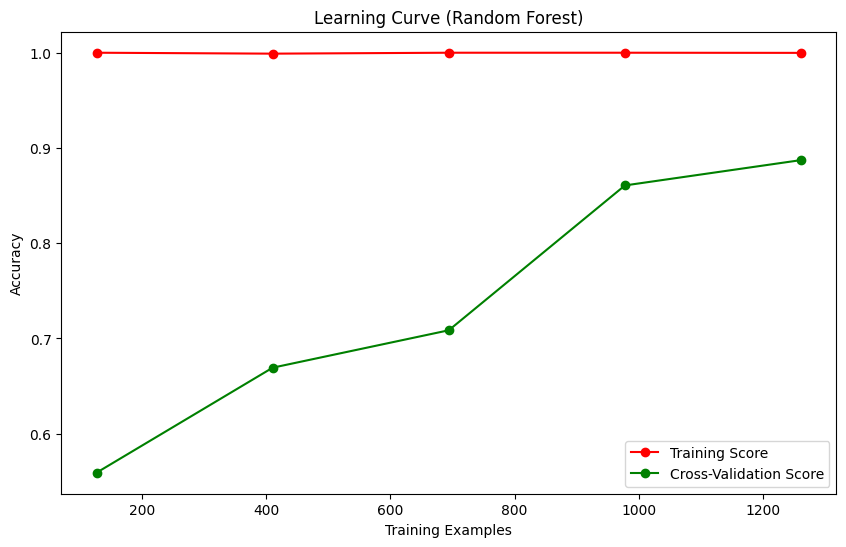

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/L

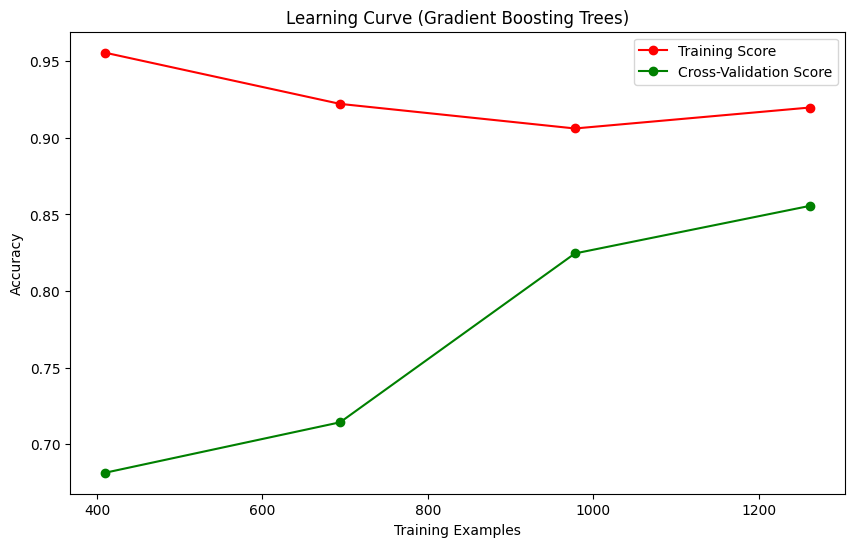

In [27]:
#Bias-Variance Tradeoff (Learning Curves)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()
   
# Plot learning curve for Random Forest
plot_learning_curve(best_rf, "Learning Curve (Random Forest)", X_train_balanced, y_train_balanced)

# Plot learning curve for Gradient Boosting Trees
plot_learning_curve(gbt, "Learning Curve (Gradient Boosting Trees)", X_train_balanced, y_train_balanced)

    

## Data set: Youtube Shorts & TikTok 2025

In [28]:
!pip3 install imblearn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
%matplotlib inline



In [29]:
#load data set
df = pd.read_csv("/Users/macbook/Desktop/internship/data/AItools.csv")

In [30]:
df.head()

,tool_name,company,category_canonical,modality_canonical,open_source,api_available,api_status,website,source_domain,release_year,...,mod_image,mod_video,mod_audio,mod_code,mod_design,mod_infra,mod_productivity,mod_safety,mod_multimodal,modality_count
0,ChatGPT,OpenAI,LLMs & Chat Assistants,multimodal,0,1,api,https://chatgpt.com,chatgpt.com,2022,...,0,0,0,0,0,0,0,0,1,0
1,Claude,Anthropic,LLMs & Chat Assistants,multimodal,0,1,api,https://claude.ai,claude.ai,2023,...,0,0,0,0,0,0,0,0,1,0
2,Gemini,Google,LLMs & Chat Assistants,multimodal,0,1,api,https://gemini.google.com,gemini.google.com,2023,...,0,0,0,0,0,0,0,0,1,0
3,Midjourney,Midjourney,Image Gen & Editing,image,0,0,unavailable,https://www.midjourney.com,midjourney.com,2022,...,1,0,0,0,0,0,0,0,0,1
4,Stable Diffusion,Stability AI,Image Gen & Editing,image,1,1,api,https://stability.ai/stable-image,stability.ai,2022,...,1,0,0,0,0,0,0,0,0,1
